## Task-D: Collinear features and their effect on linear models

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('task_d.csv')

In [ ]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [ ]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [ ]:
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

1.1

In [ ]:
#Using the libraries of sklearn
corelationMatrix = data.corr()
corelationMatrix

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


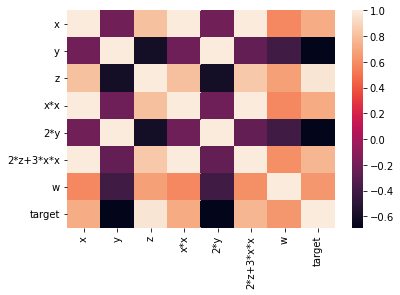

In [ ]:
# b. plotting the heat map
sns.heatmap(corelationMatrix )

In [ ]:
corelationMatrix.style.background_gradient(cmap='coolwarm')

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


1.2

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe =Pipeline([("classifier",LogisticRegression())])
grid_param= [
             {
                 "classifier":[LogisticRegression()],
              "classifier__penalty": ['l1','l2'],
              "classifier__C" : np.logspace(-1,4,500),
             }
]
gridsearch = GridSearchCV(pipe,grid_param,cv=5,verbose=2,n_jobs=-1)
best_model= gridsearch.fit(X,Y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X,Y))

Pipeline(steps=[('classifier', LogisticRegression(C=0.1))])
The mean accuracy of the model is: 1.0


In [ ]:
print("Best parameter (CV score=%0.3f):" % gridsearch.best_score_)
print(gridsearch.best_params_)

Best parameter (CV score=1.000):
{'classifier': LogisticRegression(C=0.1), 'classifier__C': 0.1, 'classifier__penalty': 'l2'}


1.3


In [ ]:
best_logistic_regression_model= LogisticRegression(C=gridsearch.best_params_['classifier__C'])
best_logistic_regression_model.fit(X,Y)
best_logistic_regression_model_accuracy = best_logistic_regression_model.score(X,Y)
print(best_logistic_regression_model_accuracy)
best_logistic_model_weights=best_logistic_regression_model.coef_
print("The weights of the original logistic regression model is ",best_logistic_model_weights)

1.0
The weights of the original logistic regression model is  [[ 0.41339802 -0.51553068  0.78497195  0.39392784 -0.51553068  0.44931007
   0.34658609]]


1.4

In [ ]:
X = X + np.random.normal(0,10**-2,X.shape)
best_logistic_regression_model_edited= LogisticRegression(C=gridsearch.best_params_['classifier__C'])
best_logistic_regression_model_edited.fit(X,Y)
best_logistic_regression_model_edited_accuracy = best_logistic_regression_model_edited.score(X,Y)
print(best_logistic_regression_model_edited_accuracy)
best_logistic_model_weights_edited=best_logistic_regression_model_edited.coef_
print("The weights of the edited logistic regression model is ",best_logistic_regression_model_edited.coef_)

1.0
The weights of the edited logistic regression model is  [[ 0.41382642 -0.51562925  0.7857692   0.39292078 -0.51535991  0.44886219
   0.34680886]]


In [ ]:
difference_logistic_regression = abs(best_logistic_regression_model_edited_accuracy - best_logistic_regression_model_accuracy)
print("The difference of between both logistic regression ", difference_logistic_regression)

The difference of between both logistic regression  0.0


In [ ]:
abs_weight_difference = abs(best_logistic_model_weights - best_logistic_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)

absolute weights difference [[4.28393638e-04 9.85715897e-05 7.97252771e-04 1.00705728e-03
  1.70770281e-04 4.47879525e-04 2.22772385e-04]]
absolute weights percent difference [[0.04283936 0.00985716 0.07972528 0.10070573 0.01707703 0.04478795
  0.02227724]]


In [ ]:
abs_weight_difference = abs(best_logistic_model_weights - best_logistic_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)
top4 = np.argsort(-abs_weight_percent_diff)[:,:4]
print('Top 4 feature index ',top4[:4]) #Top 4 feture index with highest difference in weights
features = data.columns
print("Top 4 features having highest absolute percentage weight change are", features[top4])

absolute weights difference [[4.28393638e-04 9.85715897e-05 7.97252771e-04 1.00705728e-03
  1.70770281e-04 4.47879525e-04 2.22772385e-04]]
absolute weights percent difference [[0.04283936 0.00985716 0.07972528 0.10070573 0.01707703 0.04478795
  0.02227724]]
Top 4 feature index  [[3 2 5 0]]
Top 4 features having highest absolute percentage weight change are [['x*x' 'z' '2*z+3*x*x' 'x']]


**Experiment 2**
<br>1.2 

In [ ]:
from sklearn.svm import  LinearSVC
pipe =Pipeline([("classifier",LogisticRegression())])
grid_param= [
             {
                 "classifier":[LinearSVC()],
                 "classifier__penalty": ['l1','l2'],
                 "classifier__C" : np.logspace(-4,4,500),
             }
]
gridsearch = GridSearchCV(pipe,grid_param,cv=5,verbose=2,n_jobs=-1)
best_model= gridsearch.fit(X,Y)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X,Y))

Pipeline(steps=[('classifier', LinearSVC(C=0.0001))])
The mean accuracy of the model is: 1.0


In [ ]:
print("Best parameter (CV score=%0.3f):" % gridsearch.best_score_)
print(gridsearch.best_params_)

Best parameter (CV score=1.000):
{'classifier': LinearSVC(C=0.0001), 'classifier__C': 0.0001, 'classifier__penalty': 'l2'}


1.3

In [ ]:
best_SVM_model= LogisticRegression(C=gridsearch.best_params_['classifier__C'])
best_SVM_model.fit(X,Y)
best_SVM_model_accuracy = best_SVM_model.score(X,Y)
print("The best value of accuracy score is ",best_SVM_model_accuracy)
best_SVM_model_weights=best_SVM_model.coef_
print("The weights of the original logistic regression model is ",best_SVM_model_weights)

The best value of accuracy score is  1.0
The weights of the original logistic regression model is  [[ 0.00359778 -0.00341575  0.00480441  0.00354769 -0.00341889  0.00377547
   0.00316922]]


1.4

In [ ]:
X = X + np.random.normal(0,10**-2,X.shape)
best_SVM_model_edited= LinearSVC(C=gridsearch.best_params_['classifier__C'])
best_SVM_model_edited.fit(X,Y)
best_SVM_model_edited_accuracy = best_SVM_model_edited.score(X,Y)
print(best_SVM_model_edited_accuracy)
best_SVM_model_weights_edited=best_SVM_model_edited.coef_
print("The weights of the edited logistic regression model is ",best_SVM_model_edited.coef_)

1.0
The weights of the edited logistic regression model is  [[ 0.0132199  -0.01278715  0.01795682  0.01304054 -0.01283076  0.0139099
   0.01166027]]


In [ ]:
difference_SVM = abs(best_SVM_model_edited_accuracy - best_SVM_model_accuracy)
print("The difference of between both logistic regression ", difference_SVM)

The difference of between both logistic regression  0.0


In [ ]:
abs_weight_difference = abs(best_SVM_model_weights - best_SVM_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)

absolute weights difference [[0.00962212 0.0093714  0.01315241 0.00949284 0.00941188 0.01013443
  0.00849105]]
absolute weights percent difference [[0.96221184 0.93713981 1.31524087 0.94928429 0.94118757 1.01344293
  0.8491051 ]]


In [ ]:
abs_weight_difference = abs(best_SVM_model_weights - best_SVM_model_weights_edited)
print(f"absolute weights difference", abs_weight_difference)
abs_weight_percent_diff = abs_weight_difference*100
print(f"absolute weights percent difference", abs_weight_percent_diff)
top4 = np.argsort(-abs_weight_percent_diff)[:,:4]
print('Top 4 feature index ',top4[:4]) #Top 4 feture index with highest difference in weights
features = data.columns
print("Top 4 features having highest absolute percentage weight change are", features[top4])

absolute weights difference [[0.00962212 0.0093714  0.01315241 0.00949284 0.00941188 0.01013443
  0.00849105]]
absolute weights percent difference [[0.96221184 0.93713981 1.31524087 0.94928429 0.94118757 1.01344293
  0.8491051 ]]
Top 4 feature index  [[2 5 0 3]]
Top 4 features having highest absolute percentage weight change are [['z' '2*z+3*x*x' 'x' 'x*x']]


**Observation**


1.   From the accuracy score which is 1 is due to overfitting due to multi collinearity.
2.   Adding small error did not effect the accuracy of the model.
3.   Observing the top four features with the biggest difference in coefficients of original data and noisy data, we can conclude that features with high corelation and multi-colinearity are affected by outliers (added noises) and their coefficients are changing.
